In [ ]:
%matplotlib inline
import numpy as np
from pandas import DataFrame as df
from Classifiers import TransparentRidge
from Classifiers import TransparentLasso
from scipy.sparse import diags
import matplotlib.pyplot as plt
import PredictiveModels as pm
import pandas as pd
from LatestPreprocessing import *

# User Transparency

In [91]:
user_stats = pd.read_csv('ml-latest/user_stats.csv', sep = ',',nrows=20)
print user_stats.head(10)

   User ID  Number of Ratings  Average Rating  Variance  Genre Ratio  Key Ratio  Fitness
0   242763               1929          2.8750    4.0920       0.0000     0.0400   0.3690
1    28451               1274          2.8130    3.9090       0.0000     0.0860   0.3050
2    87971               1181          3.3830    3.4260       0.0000     0.0650   0.2780
3   155440               1028          2.6310    3.2920       0.0000     0.0850   0.2450
4    60484               1224          2.0540    3.1140       0.0000     0.0770   0.2340
5   120899               2031          2.6620    2.3560       0.0000     0.0220   0.2140
6    46262                747          2.5090    3.6030       0.0000     0.1590   0.2020
7   225941               1646          1.7970    2.3480       0.0000     0.0370   0.1980
8   170099               2067          3.2150    2.1790       0.0000     0.0210   0.1970
9   234450               1798          2.8850    2.2150       0.0000     0.0340   0.1870


## Loading user matrix

In [2]:
userid = 46262
user_ratings = get_matched_user_ratings(46262)
movies = user_ratings.keys()
ratings = user_ratings.values()
print "User average rating: ", np.average(ratings)
print "Number of movies rated by this user: ", len(ratings)

User average rating:  2.48167539267
Number of movies rated by this user:  764


In [29]:
print "Loading average and number of rating"
idxs = [id_dict[k] for k in movies]
avg_and_num = sort_avg()
id_dict = get_id_row_dict()

Loading average and number of rating


## Highest rated movies

In [30]:
pd.set_option('display.width', 100)
movie_set = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
avg_df = df(np.column_stack((movie_set.title,avg_and_num)), columns = ("Movie", "Average Rating", "Number of Ratings"))
print avg_df.sort(["Average Rating"], ascending=0).head(20)

(21811, 4)
(21811L, 2L)
                                                  Movie Average Rating Number of Ratings
8845                     FRACCHIA CONTRO DRACULA (1985)              5                 1
12508                         EMMANUELLE IN SOHO (1981)              5                 1
17480                         PEOPLE OF THE WIND (1976)              5                 1
7023                                         CMA (1980)              5                 1
17488       ADVENTURES OF A TEENAGE DRAGONSLAYER (2010)              5                 1
20769                                      DUSKA (2007)              5                 1
13094                             GHATAK: LETHAL (1996)              5                 1
4081                                    FREEHELD (2007)              5                 1
13697                        TWO O'CLOCK COURAGE (1945)              5                 1
17522                                  UNRELATED (2007)              5                

## User rating distribution

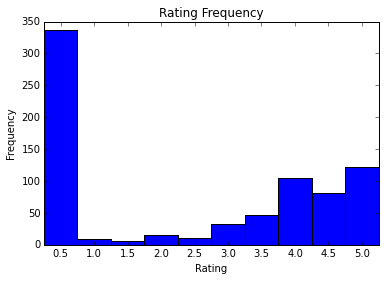

In [5]:
x = ratings
his = np.histogram(x, bins = np.arange(0.5,6,0.5))
fig, ax = plt.subplots()
offset = 0.25
plt.bar(his[1][1:],his[0],width=.5)
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels(np.arange(0.5,6,0.5))
plt.title("Rating Frequency")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

## Genre Distribution

In [6]:
print "Loading genre matrix"
genre_matrix = get_genre_matrix()[idxs]
genre_dict = get_genre_dict()
inv_map = {v: k for k, v in genre_dict.items()}
names = [inv_map[k] for k in range(len(genre_dict))]

Loading genre matrix


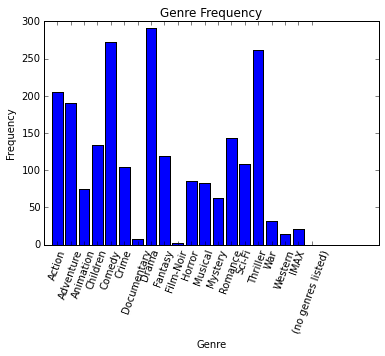

In [10]:
x = np.sum(genre_matrix, axis=0)
his = np.histogram(x, bins = range(0,21))
fig, ax = plt.subplots()
offset = 0
plt.bar(his[1][1:],x,align='center')
ax.set_xticks(his[1][1:] + offset)
ax.set_xticklabels((list(names)))
locs, labels = plt.xticks()
plt.setp(labels, rotation=70)
plt.title("Genre Frequency")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.show()

In [14]:
print "Loading key matrix"
keywords = pd.read_csv("ml-latest/matched_movies", delimiter='\t', usecols = [0,3], names = ['id', 'key'] )
x = get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
names = [inv_map[k] for k in range(len(x))]
user_key_matrix = get_keyword_matrix()[idxs]

Loading key matrix
Number of popular keys:

 2336


## User Keyword Frequency

In [16]:
frequency = np.sum(user_key_matrix, axis=0)
keyword_df = df((np.column_stack((names, frequency))), columns = ("Keyword", "Frequency"))
print keyword_df.sort(["Frequency"], ascending = 0).head(20)

                          Keyword Frequency
2187                     computer      99.0
1991                         snow      98.0
1411  brother-sister-relationship      98.0
1505                     marriage      97.0
1675                         gore      97.0
1292                   cell-phone      97.0
703                       beating      96.0
1236                    deception      96.0
1688          hand-to-hand-combat      96.0
562                   machine-gun      95.0
1041                        horse      95.0
1139                       singer      95.0
1210                      shotgun      94.0
2110                       crying      93.0
1641                    face-slap      93.0
183                           boy      93.0
2271                  watching-tv      93.0
1084             good-versus-evil      92.0
262             slow-motion-scene      91.0
1034                       doctor      91.0


## User Actor Frequency

In [24]:
print "Loading actor matrix"
actor_matrix = get_actor_matrix()[idxs]
frequency = np.sum(actor_matrix, axis=0)
names = get_actor_names()
actor_df = df((np.column_stack((names, frequency))), columns = ("Actor", "Frequency"))
print actor_df.sort_index(by=["Frequency"], ascending = 0).head(20)

Loading actor matrix
                         Actor Frequency
776        Freeman, Morgan (I)       9.0
97               Flowers, Bess       9.0
337           Bacon, Kevin (I)       9.0
1123      Lee, Christopher (I)       9.0
348            Bale, Christian       9.0
1443  Plummer, Christopher (I)       9.0
820          Goodman, John (I)       9.0
806            Gibson, Mel (I)       9.0
1555       Rosales Jr., Thomas       9.0
1798             Weaving, Hugo       9.0
196            Newman, Laraine       9.0
707           Ellis, Chris (I)       9.0
232          Smith, Maggie (I)       9.0
475        Campbell, Bruce (I)       9.0
518             Cheung, George       9.0
566          Cooper, Chris (I)       9.0
553           Coltrane, Robbie       9.0
405         Boone Junior, Mark       8.0
1211         Martin, Steve (I)       8.0
1203        Marsden, James (I)       8.0

## Creating Lasso Model with Cross Validation and 5 Folds

In [53]:
data = np.column_stack((avg_and_num[idxs], genre_matrix, user_key_matrix, actor_matrix))
target = ratings
results = pm.get_lasso_cv_results(np.column_stack((data,target)), 0.1)

y_pred = results[2]
ratings = user_ratings.values()
error_from_pred = np.abs(ratings-y_pred)

col_names = ["Movie ID" ,"User Rating","Model Prediction","Model Error"]

col_avg = ["Average:", np.average(ratings),np.average(y_pred),np.average(error_from_pred)]
user_result = np.column_stack((user_ratings.keys(), ratings, y_pred, error_from_pred))
user_result = user_result[np.argsort(user_result[:, 3])]
user_result = np.vstack((user_result,col_avg))

results_df = pd.DataFrame(user_result, columns = col_names)
print "Ten Lowest Errors"
print results_df.head(10)
print "\nTen Highest Errors"
print results_df.tail(10)

Ten Lowest Errors
  Movie ID User Rating Model Prediction       Model Error
0  30825.0         3.0    3.00299005368  0.00299005367681
1   2424.0         3.5    3.48557112558   0.0144288744204
2  44399.0         3.5     3.4845990596   0.0154009403957
3   8907.0         3.5    3.53054466739   0.0305446673875
4  45720.0         3.0    2.96018471575   0.0398152842549
5   5651.0         3.0    2.94981961389   0.0501803861078
6  32383.0         3.0    2.94678182427   0.0532181757265
7   1270.0         4.0    3.94445644598   0.0555435540242
8   2321.0         3.0    2.94026145765    0.059738542355
9  33493.0         3.0    2.92712922341   0.0728707765889

Ten Highest Errors
     Movie ID    User Rating Model Prediction    Model Error
755   52722.0            5.0     1.7320962821   3.2679037179
756    2683.0            0.5    3.81844806781  3.31844806781
757   45499.0            5.0    1.62081181699  3.37918818301
758   51412.0            5.0    1.62006328615  3.37993671385
759    8972.0      

## Creating Lasso Model with Full Training Set

In [54]:
clf =TransparentLasso(0.1)
user_cols = data.shape[1]+1
clf.fit(data,target)
weights = clf.coef_
neg_evi, pos_evi = clf.predict_evidences(data)
bias = clf.get_bias()
y_pred = clf.predict(data)
indices = np.argsort(y_pred)
coef_diags = diags(clf.coef_, 0)
dm = data * coef_diags

## Weights and Features

In [63]:
get_popular_key_dict(keywords.key)
inv_map = {v: k for k, v in x.items()}
key_names = [inv_map[k] for k in range(len(x))]
genre_names = get_genre_dict().keys()
actor_names = get_actor_names()
features = np.hstack([['Average Rating', 'Number of Ratings'], genre_names, key_names, actor_names])

positive_weight_indices = weights > 0
negative_weight_indices = weights < 0

positive_features = np.column_stack((features[positive_weight_indices], weights[positive_weight_indices].astype(float)))
negative_features = np.column_stack((features[negative_weight_indices], weights[negative_weight_indices].astype(float)))

positive_df = pd.DataFrame(positive_features, columns = ["Features", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)
positive_df = positive_df.sort("Weights", ascending=0)

negative_df = pd.DataFrame(negative_features, columns = ["Features", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

negative_df = negative_df.sort("Weights", ascending=1)

print positive_df.head(10)
print negative_df.head(10)

            Features   Weights
2             Horror  0.445047
1             Sci-Fi  0.419289
3            Fantasy  0.175000
5     box-office-hit  0.172481
4                War  0.014576
0  Number of Ratings  0.000018
           Features   Weights
2            Comedy -0.857482
0             Drama -0.388072
3     female-nudity -0.297851
1         Animation -0.233941
7            murder -0.120635
6  independent-film -0.103110
5          violence -0.048616
4             blood -0.032987


## The Highest Rating

In [85]:
j = indices[-1]
titles = pd.read_csv("ml-latest/matched_set.csv", sep = ",")
movie_id = movies[j]
movie_index = np.where(movies == movie_id)
movie_dm = dm[movie_index][0]
title = titles.title[np.where(titles.id == movie_id)[0]]
feature_names = features

positive_weights = movie_dm[movie_dm > 0]
negative_weights = movie_dm[movie_dm < 0]

positive_names = feature_names[movie_dm > 0]
negative_names = feature_names[movie_dm < 0]

positive_weights = np.column_stack((positive_names,positive_weights))
positive_weights = positive_weights[np.argsort(positive_weights[:,1])][::-1]

negative_weights = np.column_stack((negative_names,negative_weights))
negative_weights = negative_weights[np.argsort(negative_weights[:,1])][::-1]

positive_df = pd.DataFrame(positive_weights, columns = ["Feature", "Weights"])
positive_df = positive_df.convert_objects(convert_numeric=True)

negative_df = pd.DataFrame(negative_weights, columns = ["Feature", "Weights"])
negative_df = negative_df.convert_objects(convert_numeric=True)

pd.options.display.float_format = '{:,.4f}'.format

print "Movie Title: ", title
print "User Rating: ", user_ratings[movie_id]

Movie Title:  15495    TOY STORY (1995)
Name: title, dtype: object
User Rating:  4.0


### Movie Rating Distribution

### Evidence

In [79]:
print "Prediction: ",  clf.predict(data[j])[0]
print "Bias and evidences:", bias, neg_evi[j], pos_evi[j]
print "Positive Features"
print positive_df.head(10)
print "Negative Features"
print negative_df.head(10)

Prediction:  4.85745591264
Bias and evidences: 2.59684121424 -0.0486159233249 2.30923062172
Positive Features
             Feature  Weights
0  Number of Ratings   1.0974
1             Horror   0.4450
2             Sci-Fi   0.4193
3            Fantasy   0.1750
4     box-office-hit   0.1725
Negative Features
    Feature  Weights
0  violence  -0.0486


## The Lowest Rating

### Movie Rating Distribution

### Evidence

## The case that has the most negative evidence, regardless of positive evidence

### Movie Rating Distribution

### Evidence

## The case that has the most positive evidence, regardless of negative evidence

### Movie Rating Distribution

### Evidence

# Most conflicted

### Movie Rating Distribution

### Evidence

# Least amount of info

### Movie Rating Distribution

### Evidence

## Defining movie matrix for unrated films

## Predicting unrated films using Ridge and 5 fold cross validation

## Predicting unrated films using Lasso and 5 fold cross validation